In [28]:
from h5imagegenerator import HDF5ImageGenerator

from albumentations import (
    Compose, ShiftScaleRotate, HorizontalFlip
)

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
mean_std_gen = HDF5ImageGenerator(
    src= './v3/val.h5',
    scaler=False,
    labels_encoding='hot',
    batch_size=8)

In [31]:
# next batch
images_alpha, labels = mean_std_gen[0]

In [32]:
# tensors shapes
'Images:', images.shape, 'Labels:', labels[0]

('Images:', (8, 150, 150, 3), 'Labels:', array([0., 1.], dtype=float32))

In [33]:
aug = Compose([
    ShiftScaleRotate(
        shift_limit=0.0225,
        scale_limit=0.06,
        rotate_limit=30
    ),
    HorizontalFlip()
])

In [34]:
mean_std_aug_gen = HDF5ImageGenerator(
    src= './v3/val.h5',
    scaler=False,
    augmenter=aug,
    labels_encoding='hot',
    batch_size=8)

In [35]:
images_beta, _ = mean_std_aug_gen[0]

In [39]:
def show_images(images, cols=3, titles=None):
    assert((titles is None) or (len(images) == len(titles)))
    
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow((image * 255).astype(np.uint8))
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

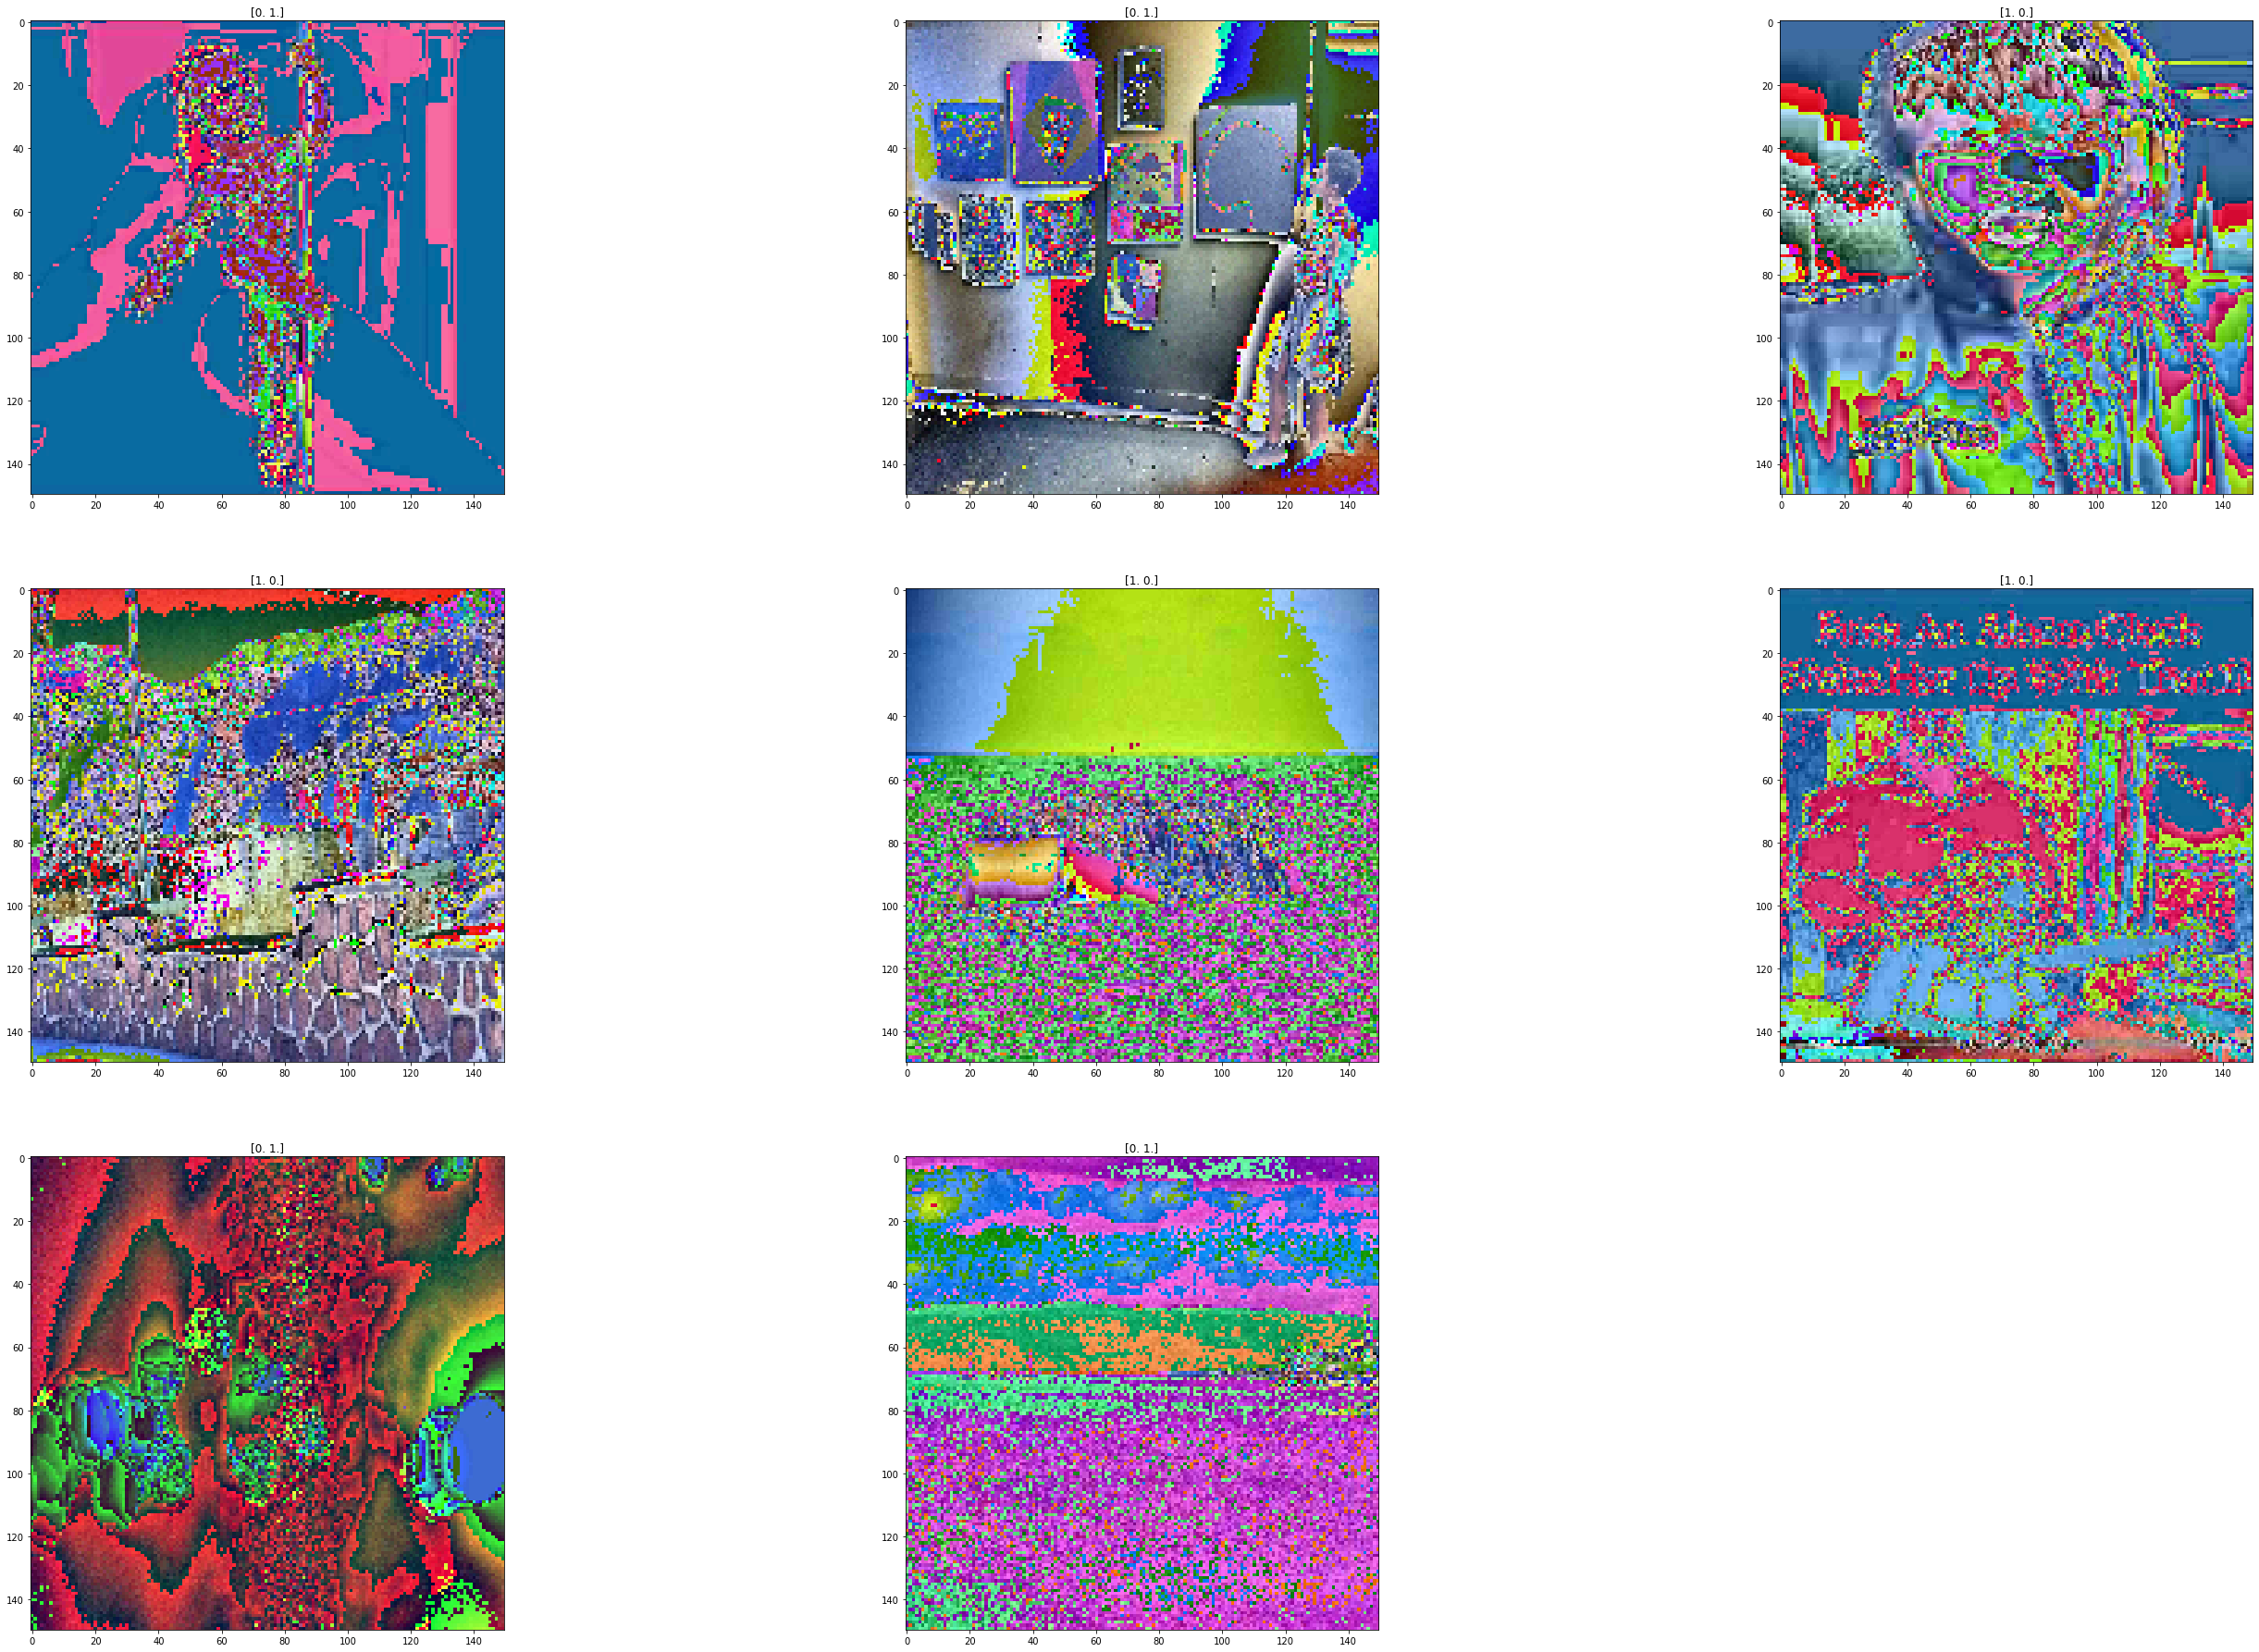

In [40]:
show_images(images_alpha, titles=labels)

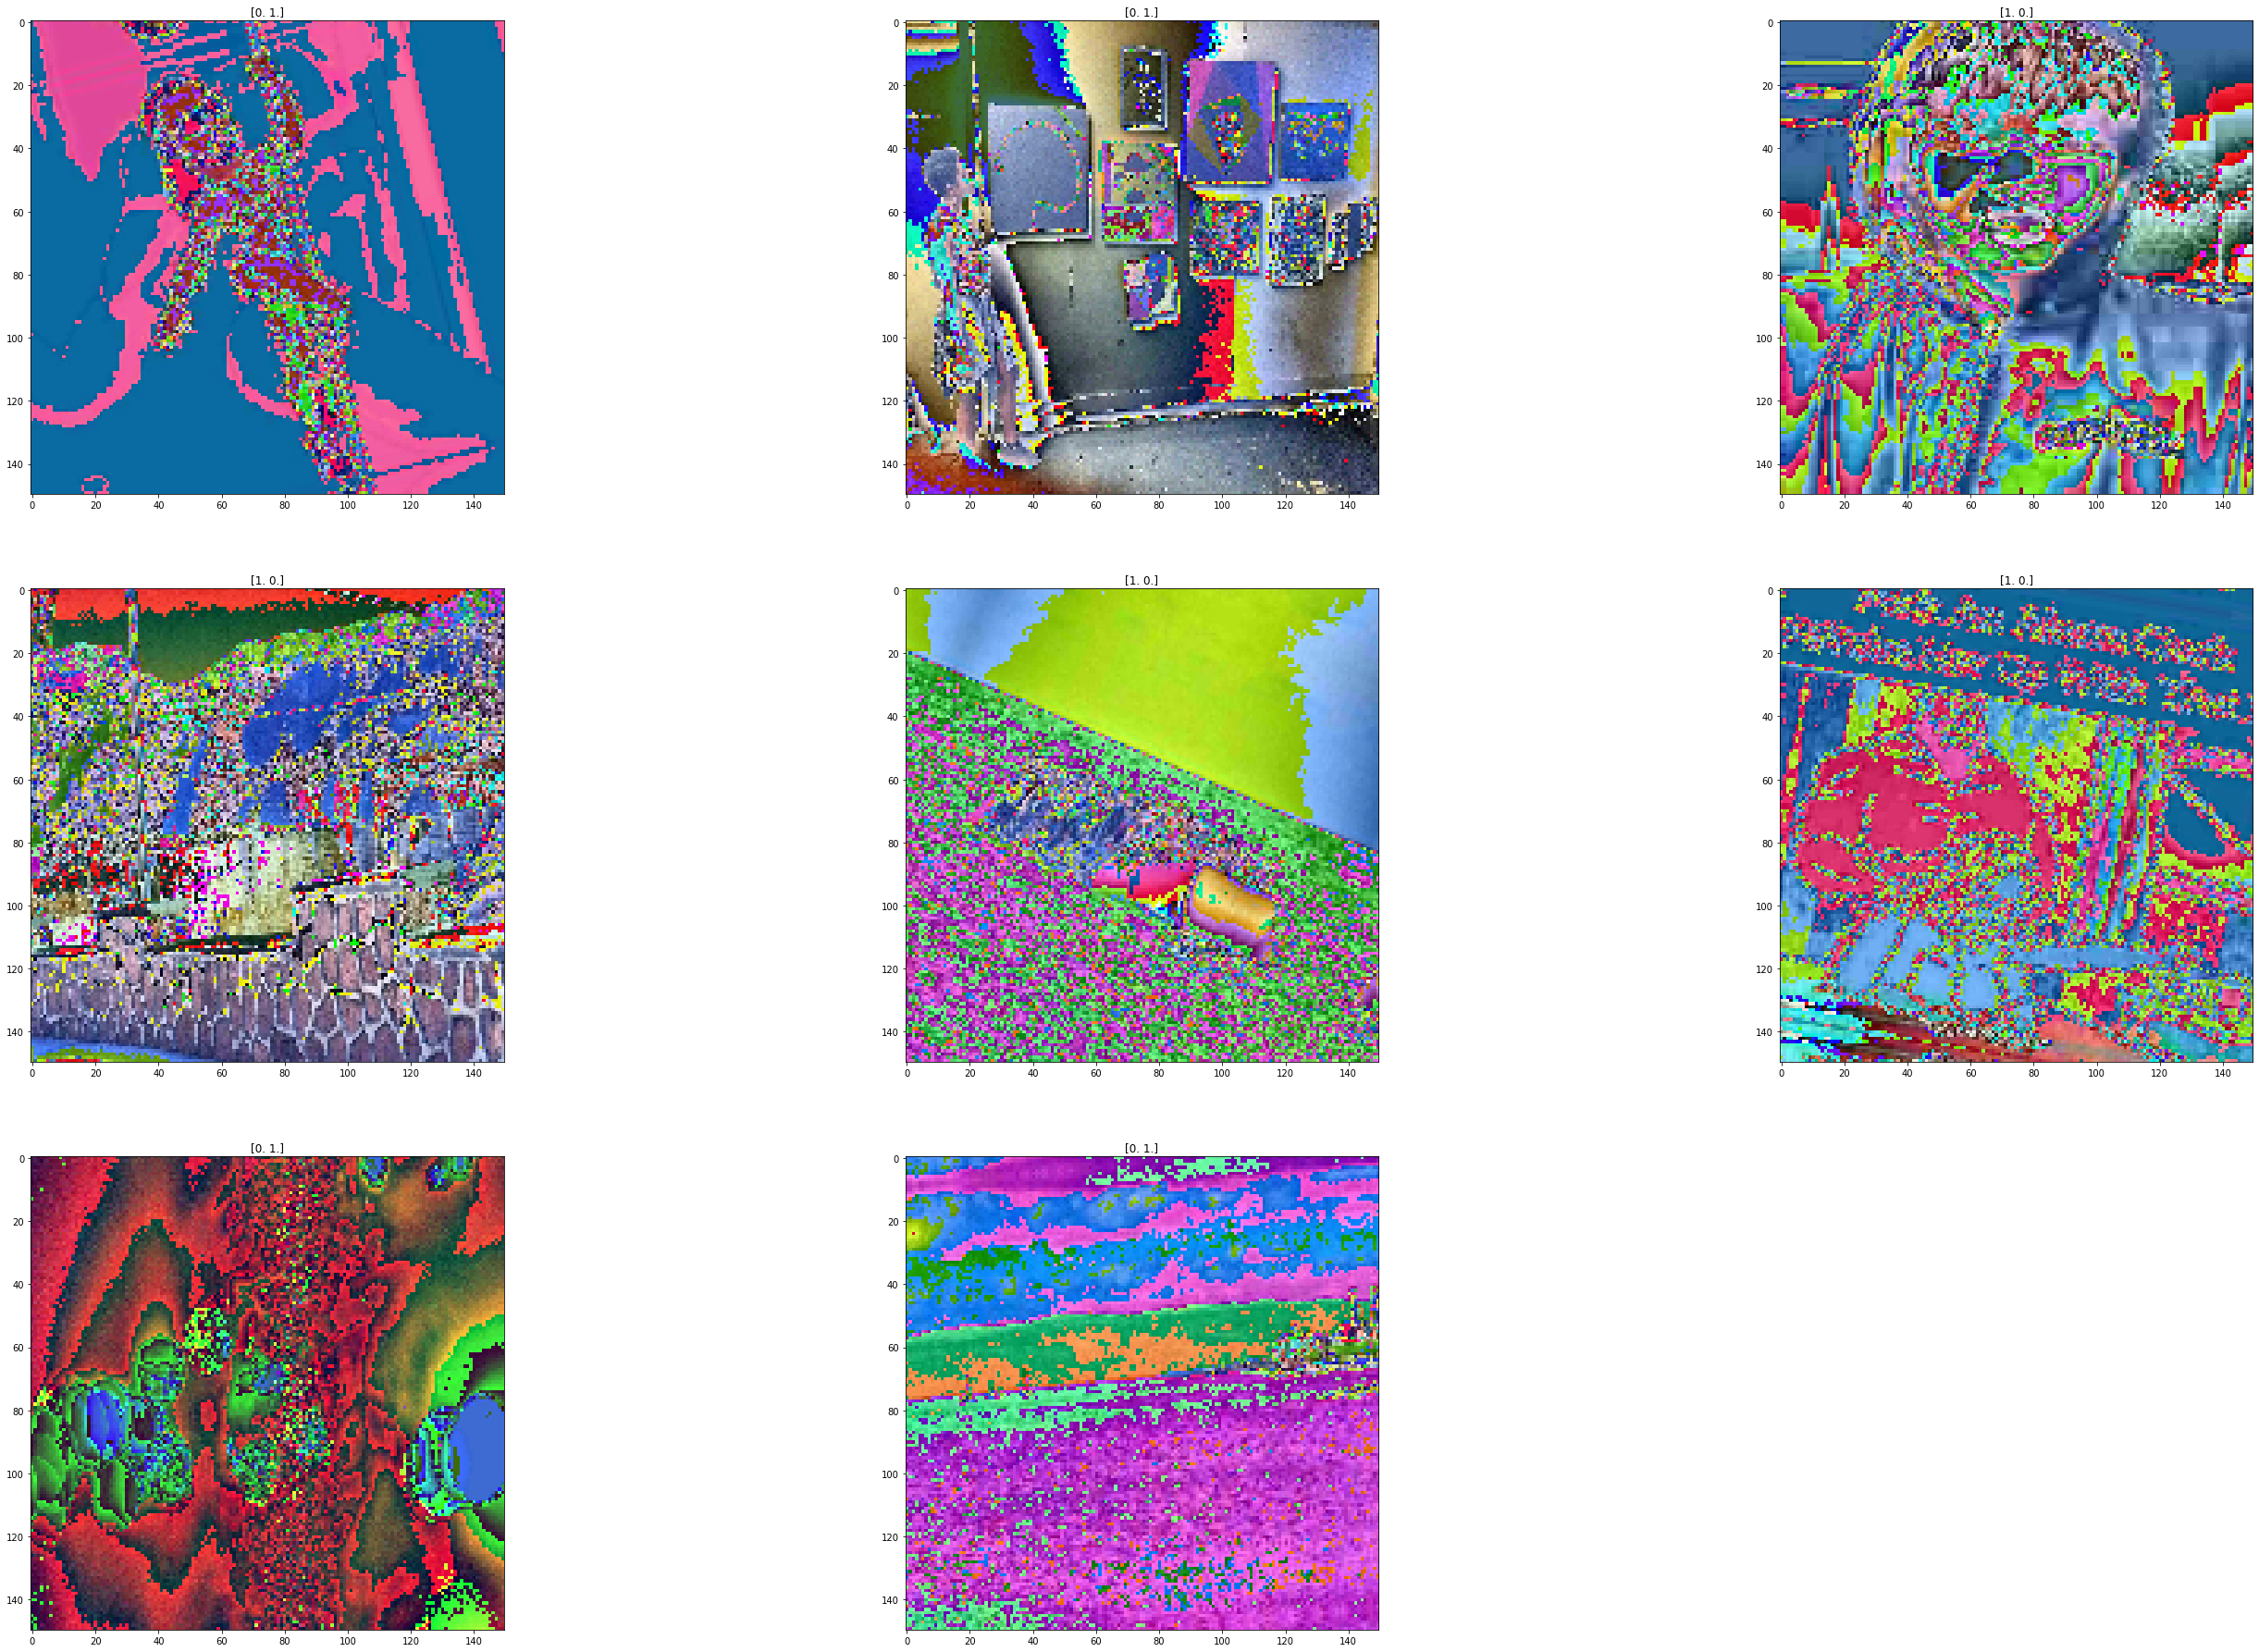

In [41]:
show_images(images_beta, titles=labels)